In [9]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# Load the CSV file into a Pandas DataFrame
csv_file = "csv/Audience Report.csv"  # Replace with the actual file path
df = pd.read_csv(csv_file)

C:\Users\Rafael_Fagundes\AppData\Local\Temp\ipykernel_27292\1733474572.py:8: DtypeWarning: Columns (8,10,11,12,14,15,16,17,18,19,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


In [8]:
df.head()

,Display Audience Funnel,Display Supplier Country,Dell Fiscal Quarter,Display Vehicle,Display Business Unit,Display Report Site Name,Campaign Name,Media Buy Name,Display BRR Line Item,Audience Type Category (Raw),Flight Capped Spend (USD) - Final,Impressions,Clicks,True Conversion (GCSB) (Calc),True Revenue,US CSB CT+VT Conversions,US CSB CT+VT Revenue,US BU Visits,US Total Visits,Total COM HVEs 4.0 Custom (Calc) Updated,FM MAPs OA,US DPID Total Revenue,B2B vs CSB,9th Element,Audience ID,Audience Composition,Country-BU,Data provider,AIQ Attribute Category,1/2/3 PD,Audience ID Group,Clean Audience Type Category
0,Brand Seeker/Purchasers,Australia,FY24Q1,Video,Alienware,Fandom,2024_1H_AU_CSBO-AW_BSP_DISPLAY_PROSPECTING_DEM...,ValMorganOnline_Fandom_FANDOMVIDEOFANTAKEOVERH...,NaN,DOMAIN-3PD CONTEXTUAL,NaN,464233,407,0.0,736.69472,2.0,1001.209664,172,0,83,0.0,910.19,CSB,NaN,CHECK,CHECK,CHECK,CHECK,CHECK,DOMAIN-3PD CONTEXTUAL,CHECK,DOMAIN-3PD CONTEXTUAL
1,Brand Seeker/Purchasers,Australia,FY24Q1,Video,Alienware,Fandom,2024_1H_AU_CSBO-AW_BSP_DISPLAY_PROSPECTING_DEM...,ValMorganOnline_Fandom_FANDOMVIDEOFANTAKEOVERD...,NaN,DOMAIN-3PD CONTEXTUAL,NaN,351621,660,0.0,0.0,NaN,0.0,235,0,59,0.0,NaN,CSB,NaN,CHECK,CHECK,CHECK,CHECK,CHECK,DOMAIN-3PD CONTEXTUAL,CHECK,DOMAIN-3PD CONTEXTUAL
2,Brand Seeker/Purchasers,Australia,FY24Q1,Video,Alienware,Fandom,2024_1H_AU_CSBO-AW_BSP_DISPLAY_PROSPECTING_DEM...,ValMorganOnline_Fandom_FANDOMVIDEOFANTAKEOVERD...,NaN,DOMAIN-3PD CONTEXTUAL,NaN,993757,1652,0.0,0.118731,NaN,0.0,626,0,123,0.0,NaN,CSB,NaN,CHECK,CHECK,CHECK,CHECK,CHECK,DOMAIN-3PD CONTEXTUAL,CHECK,DOMAIN-3PD CONTEXTUAL
3,Brand Seeker/Purchasers,Australia,FY24Q1,Video,Alienware,Fandom,2024_1H_AU_CSBO-AW_BSP_DISPLAY_PROSPECTING_DEM...,ValMorganOnline_Fandom_FANDOMVIDEOFANTAKEOVERD...,NaN,DOMAIN-3PD CONTEXTUAL,4518.771338,230321,341,0.0,0.0,1.0,404.3074,158,0,61,0.0,367.552,CSB,NaN,CHECK,CHECK,CHECK,CHECK,CHECK,DOMAIN-3PD CONTEXTUAL,CHECK,DOMAIN-3PD CONTEXTUAL
4,Brand Seeker/Purchasers,Australia,FY24Q1,Video,Alienware,Fandom,2024_1H_AU_CSBO-AW_BSP_DISPLAY_PROSPECTING_DEM...,ValMorganOnline_Fandom_FANDOMVIDEOFANTAKEOVERM...,NaN,DOMAIN-3PD CONTEXTUAL,3168.728508,158126,109,0.0,559.388025,1.0,245.011648,56,0,65,0.0,222.737,CSB,NaN,CHECK,CHECK,CHECK,CHECK,CHECK,DOMAIN-3PD CONTEXTUAL,CHECK,DOMAIN-3PD CONTEXTUAL


In [6]:
# Convert relevant columns to numeric data types
numeric_columns = ['True Revenue', 'Impressions']  # Add more columns as needed
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate performance metric (True Revenue / Impressions)
df['Performance'] = df['True Revenue'] / df['Impressions']

# Sort the DataFrame by performance in descending order
df_sorted = df.sort_values(by='Performance', ascending=False)

# Display the audiences with the best and worst performance
num_audiences = 10  # Number of audiences to display
best_audiences = df_sorted.head(num_audiences)
worst_audiences = df_sorted.tail(num_audiences)

print("Audiences with Best Performance:")
print(best_audiences[['Audience ID', 'Performance']])

print("\nAudiences with Worst Performance:")
print(worst_audiences[['Audience ID', 'Performance']])


Audiences with Best Performance:
      Audience ID  Performance
6158          NaN     7.703762
18940         NaN     2.421394
6157          NaN     1.987214
15093         NaN     1.952541
18969         NaN     1.950756
7658          NaN     1.779370
18997         NaN     1.771646
15108         NaN     1.699245
18198         NaN     1.591973
15260         NaN     1.584926

Audiences with Worst Performance:
      Audience ID  Performance
49272         NaN          NaN
49273         NaN          NaN
49274         NaN          NaN
49275         NaN          NaN
49276         NaN          NaN
49277         NaN          NaN
49278         NaN          NaN
49279         NaN          NaN
49280         NaN          NaN
49281         NaN          NaN


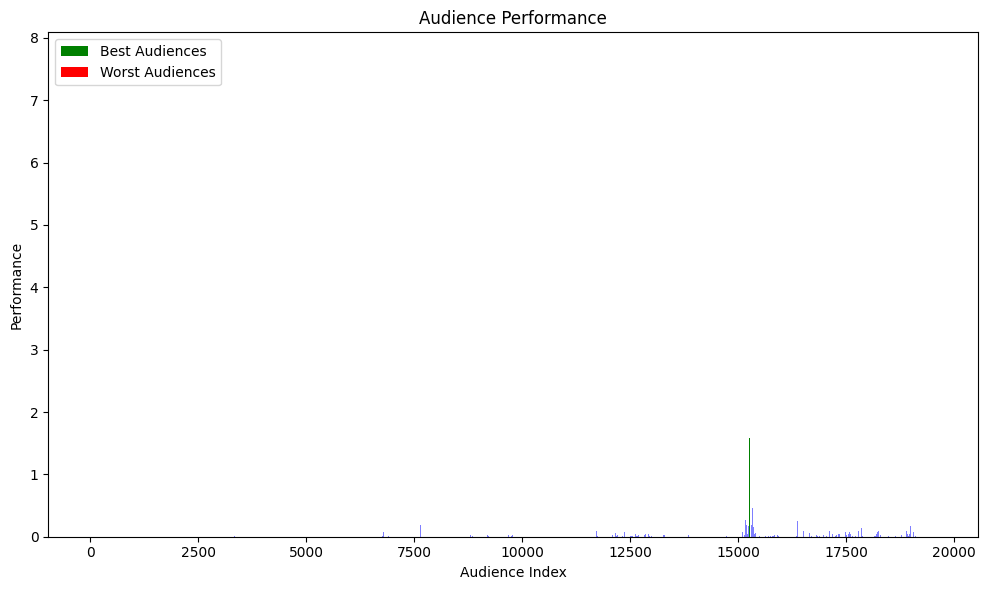

In [10]:

# Convert relevant columns to numeric data types
numeric_columns = ['True Revenue', 'Impressions']  # Add more columns as needed
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate performance metric (True Revenue / Impressions)
df['Performance'] = df['True Revenue'] / df['Impressions']

# Sort the DataFrame by performance in descending order
df_sorted = df.sort_values(by='Performance', ascending=False)

# Create a bar plot for all audiences
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(df_sorted.index, df_sorted['Performance'], color='blue', alpha=0.5)

# Highlight the best and worst audiences
num_audiences = 10  # Number of audiences to highlight
best_audiences = df_sorted.head(num_audiences)
worst_audiences = df_sorted.tail(num_audiences)

plt.bar(best_audiences.index, best_audiences['Performance'], color='green', label='Best Audiences')
plt.bar(worst_audiences.index, worst_audiences['Performance'], color='red', label='Worst Audiences')

# Add labels and title
plt.xlabel('Audience Index')
plt.ylabel('Performance')
plt.title('Audience Performance')
plt.legend()

plt.tight_layout()
plt.show()
